<h2 style = "color:blue" align = "center">K-Nearest Neighbors: Customer Service Classification </h2>

# Definition

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.


<h1> Table of content </h1>
<div class = "alert alert-block alert-info" style = "margintop: 20px">
    <ol>
        <li><a href="https://#about_dataset">About the dataset</a></li>
        <li><a href="https://#visualization_analysis">Data Visualization and Analysis</a></li>
        <li><a href="https://#classification">Classification</a></li>
    </ol>
</div>
<br>
<hr>

<h2> Import needed packages </h2>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>


Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
1- Basic Service
2- E-Service
3- Plus Service
4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


<h2> Load Dataset From CSV File </h2>

In [6]:
df = pd.read_csv('E:\Python\ML_Learn\KNN\Customer Classification\TeleCust1000t.csv')
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [45]:
df.shape

(1000, 12)

### Find the number of each class in target value

In [142]:
#Define: (1): Basic-service, (2): E-Service customers, (3):Plus Service, (4) 236 Total Service
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers

### Visualization

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

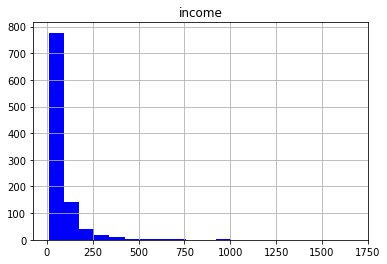

In [21]:
df.hist(column = 'income',bins = 20,color = "blue")
#Plot histogram for income feature

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

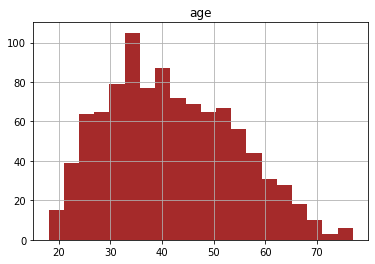

In [30]:
df.hist(column = 'age',bins = 20,color = "brown")
#Plot histogram for age feature

array([[<AxesSubplot:title={'center':'custcat'}>]], dtype=object)

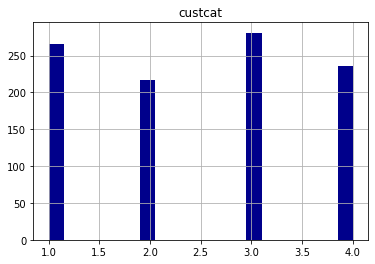

In [24]:
df.hist(column = 'custcat',bins = 20,color = "darkblue")
#Plot histogram for custcat feature

Let's choose two of dataset features to visualize in 2-d plot: Choose 'age' and 'tenure'

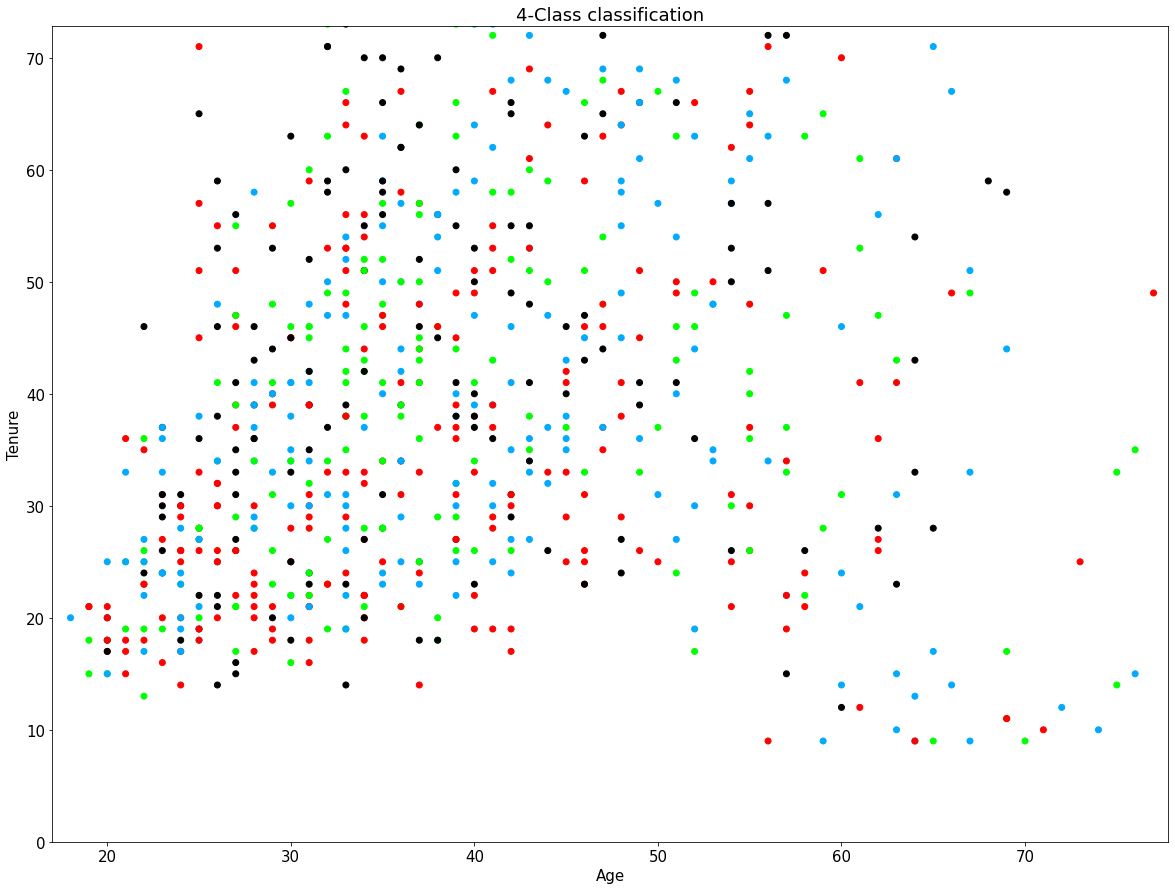

In [128]:
from matplotlib.colors import ListedColormap
#Create color 
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF','#000000'])
# Red(1) - Green(2) - Blue(3) - Black(4)
h = 0.2
y = df['custcat']
x_min, x_max = df['age'].min() - 1, df['age'].max() + 1
y_min, y_max = df['tenure'].min() - 1,df['tenure'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.scatter(df['age'], df['income'], c=y, cmap=cmap_bold, marker = "o")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("4-Class classification")
plt.xlabel("Age")
plt.ylabel("Tenure")
plt.rcParams['figure.figsize'] = [20,15]
plt.rcParams.update({'font.size': 22})
plt.show()

### Convert dataframe into numpy array to use Sklearn Library

In [32]:
#Method 1
X = np.asanyarray(df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']])
X

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [33]:
#Method 2
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [40]:
#Convert label class into np array
y = np.asanyarray(df['custcat'])

## Data Normalization


Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


In [42]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype('float'))
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

### Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)

(800, 11)

In [49]:
print("Data set",X.shape)
print("Train set:",X_train.shape)
print("Test set:",X_test.shape)

Data set (1000, 11)
Train set: (800, 11)
Test set: (200, 11)


## Training Process (Classification)


<h3>K nearest neighbor (KNN)</h3>


In [50]:
#Import Classifier
from sklearn.neighbors import KNeighborsClassifier

### Training

Let's start the algorithm with k=4 for now:

**Syntax:** variable = KNeightborsClassifier(n_neighbors = value).fit(X_train,y_train)

In [51]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predicting

We can use the model to make predictions on the test set:


In [88]:
#Predict test set
y_hat = neigh.predict(X_test)
y_hat

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4, 1, 4, 2, 1, 3, 1, 3, 4, 3, 4, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 2, 1, 1, 4, 4, 3, 2, 3, 1, 2, 3, 1, 4, 2, 1,
       2, 1, 4, 1, 4, 4, 2, 1, 2, 3, 2, 3, 3, 3, 4, 1, 1, 4, 2, 3, 3, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 1, 4, 2, 2, 3, 3, 1, 2, 4, 4, 2, 3, 4,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 4, 1, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 1, 2, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 2, 1, 1, 3, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 4, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 4,
       3, 3], dtype=int64)

In [89]:
#Actual test set
y_test

array([4, 1, 1, 2, 4, 4, 3, 1, 3, 4, 4, 2, 4, 1, 4, 3, 4, 2, 3, 4, 1, 1,
       1, 3, 4, 4, 4, 2, 4, 3, 1, 1, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 1, 1,
       2, 4, 3, 3, 2, 2, 2, 3, 2, 3, 3, 4, 4, 3, 1, 4, 1, 2, 3, 3, 3, 1,
       4, 3, 2, 4, 3, 1, 4, 3, 1, 4, 2, 4, 3, 2, 1, 3, 1, 1, 1, 2, 3, 2,
       1, 3, 4, 1, 3, 1, 3, 1, 4, 1, 1, 3, 4, 1, 4, 3, 4, 4, 2, 1, 3, 4,
       4, 1, 2, 2, 1, 2, 3, 1, 3, 1, 1, 1, 2, 3, 3, 4, 2, 4, 2, 1, 2, 1,
       3, 1, 3, 3, 2, 2, 1, 3, 2, 2, 2, 3, 1, 4, 3, 2, 2, 3, 4, 4, 4, 2,
       2, 3, 1, 2, 4, 3, 3, 1, 1, 3, 1, 4, 4, 1, 3, 2, 1, 2, 4, 2, 4, 2,
       2, 3, 4, 1, 1, 2, 3, 1, 4, 1, 4, 1, 3, 4, 2, 3, 1, 2, 3, 2, 3, 3,
       2, 3], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score
print("Train set Accuracy: ", accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, y_hat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


## Retrain with another k

In [97]:
#Retrain the model with k = 6
k6 = 6
neigh6= KNeighborsClassifier(n_neighbors = k6).fit(X_train,y_train)
neigh6

KNeighborsClassifier(n_neighbors=6)

In [99]:
y_hat6 = neigh6.predict(X_test)
y_hat6

array([3, 3, 3, 4, 4, 3, 3, 4, 2, 4, 1, 4, 3, 1, 3, 1, 4, 4, 3, 2, 3, 2,
       1, 1, 1, 3, 2, 1, 1, 2, 3, 1, 4, 2, 1, 2, 3, 1, 2, 2, 3, 2, 1, 1,
       4, 1, 2, 1, 4, 4, 2, 1, 2, 2, 2, 3, 3, 3, 1, 4, 1, 4, 2, 1, 3, 3,
       1, 3, 2, 1, 1, 3, 4, 3, 2, 1, 1, 1, 2, 3, 3, 4, 2, 4, 2, 1, 3, 3,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 4, 1, 1, 1, 4, 2, 4, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 3, 2, 3, 4, 1, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 4, 1, 1, 2, 4, 3, 4, 1, 1, 2, 1, 1, 2, 2, 1, 2, 4, 2,
       2, 3, 3, 3, 3, 1, 2, 1, 2, 1, 1, 4, 1, 1, 3, 1, 3, 3, 3, 2, 2, 2,
       1, 4, 1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 4, 1, 3, 1, 3, 3, 3, 4, 1, 3,
       1, 3], dtype=int64)

In [100]:
y_test

array([4, 1, 1, 2, 4, 4, 3, 1, 3, 4, 4, 2, 4, 1, 4, 3, 4, 2, 3, 4, 1, 1,
       1, 3, 4, 4, 4, 2, 4, 3, 1, 1, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 1, 1,
       2, 4, 3, 3, 2, 2, 2, 3, 2, 3, 3, 4, 4, 3, 1, 4, 1, 2, 3, 3, 3, 1,
       4, 3, 2, 4, 3, 1, 4, 3, 1, 4, 2, 4, 3, 2, 1, 3, 1, 1, 1, 2, 3, 2,
       1, 3, 4, 1, 3, 1, 3, 1, 4, 1, 1, 3, 4, 1, 4, 3, 4, 4, 2, 1, 3, 4,
       4, 1, 2, 2, 1, 2, 3, 1, 3, 1, 1, 1, 2, 3, 3, 4, 2, 4, 2, 1, 2, 1,
       3, 1, 3, 3, 2, 2, 1, 3, 2, 2, 2, 3, 1, 4, 3, 2, 2, 3, 4, 4, 4, 2,
       2, 3, 1, 2, 4, 3, 3, 1, 1, 3, 1, 4, 4, 1, 3, 2, 1, 2, 4, 2, 4, 2,
       2, 3, 4, 1, 1, 2, 3, 1, 4, 1, 4, 1, 3, 4, 2, 3, 1, 2, 3, 2, 3, 3,
       2, 3], dtype=int64)

In [101]:
print("Train set Accuracy: ", accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, y_hat6))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


In [107]:
#Retrain the model with k = 1
k1 = 1
neigh1= KNeighborsClassifier(n_neighbors = k1).fit(X_train,y_train)
neigh1

KNeighborsClassifier(n_neighbors=1)

In [108]:
print("Train set Accuracy: ", accuracy_score(y_train, neigh1.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, neigh1.predict(X_test)))

Train set Accuracy:  1.0
Test set Accuracy:  0.3


#### What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.


In [131]:
# Ok, let's train model with k value from 1 to 10 and check accuracy score at every case of k
ks = 30
acc = np.zeros(ks-1)
for k in range (1,ks):
    print("Epoch {}".format(k), ", k = {}".format(k))
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    y_hat = neigh.predict(X_test)
    acc[k-1] = accuracy_score(y_test,y_hat)
    print("The accuracy score when k = {}".format(k), "is:",accuracy_score(y_test,y_hat))
    


Epoch 1 , k = 1
The accuracy score when k = 1 is: 0.3
Epoch 2 , k = 2
The accuracy score when k = 2 is: 0.29
Epoch 3 , k = 3
The accuracy score when k = 3 is: 0.315
Epoch 4 , k = 4
The accuracy score when k = 4 is: 0.32
Epoch 5 , k = 5
The accuracy score when k = 5 is: 0.315
Epoch 6 , k = 6
The accuracy score when k = 6 is: 0.31
Epoch 7 , k = 7
The accuracy score when k = 7 is: 0.335
Epoch 8 , k = 8
The accuracy score when k = 8 is: 0.325
Epoch 9 , k = 9
The accuracy score when k = 9 is: 0.34
Epoch 10 , k = 10
The accuracy score when k = 10 is: 0.33
Epoch 11 , k = 11
The accuracy score when k = 11 is: 0.315
Epoch 12 , k = 12
The accuracy score when k = 12 is: 0.34
Epoch 13 , k = 13
The accuracy score when k = 13 is: 0.33
Epoch 14 , k = 14
The accuracy score when k = 14 is: 0.315
Epoch 15 , k = 15
The accuracy score when k = 15 is: 0.34
Epoch 16 , k = 16
The accuracy score when k = 16 is: 0.36
Epoch 17 , k = 17
The accuracy score when k = 17 is: 0.355
Epoch 18 , k = 18
The accuracy scor

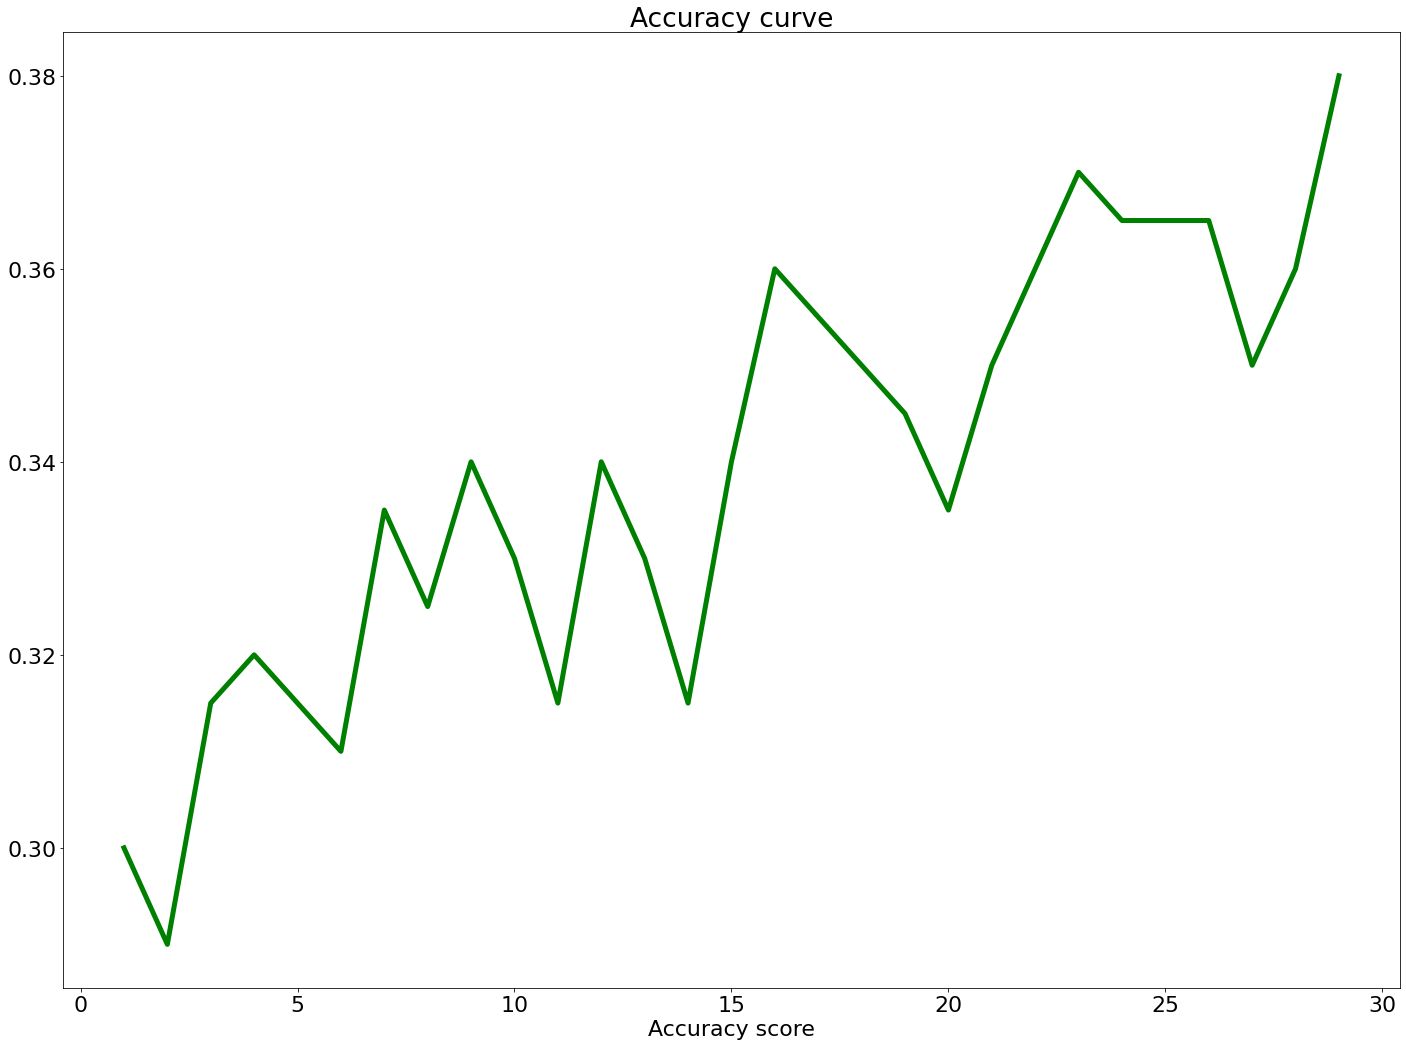

In [141]:
#Ploting accuracy curve
plt.plot(range(1,ks),acc,color = "green",linewidth = 5)
plt.xlabel('Number of Neighbors (K)')
plt.xlabel("Accuracy score")
plt.title("Accuracy curve")
plt.tight_layout()

## Comment

Without data preprocessing, the accuracy of KNN is quite low.